## Predicting Medical Personal Costs

The aim of the project is to build a machine learning model to predict the insurance cost based on different explanatory variables describing aspects of health.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real cost and the cost estimated by our model. We will evaluate model performance with the:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).


### How do I download the dataset?

- Visit the [Kaggle Website](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download).

- Remember to **log in**.

- Click the button in the upper right corner, called **Download**

**Note the following:**

- You need to be logged in to Kaggle in order to download the datasets.
- You need to accept the terms and conditions of the competition to download the dataset
- If you save the file to the directory with the jupyter notebook, then you can run the code as it is written here.


# Data Analysis

Load the dataset.


In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('insurance.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The medical costs` dataset contains 1338 rows, that is, patients, and 7 columns, i.e., variables.

6 are predictive variables and 1 is the target variable: charges

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings

6. Additional Reading Resources

## Target

Let's begin by exploring the target distribution.

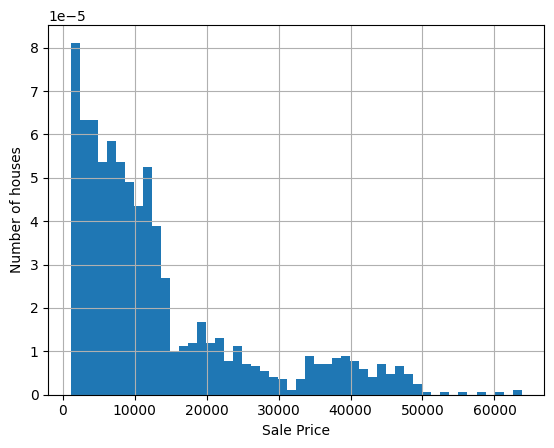

In [10]:
# histogran to evaluate target distribution

data['charges'].hist(bins=50, density=True)
plt.ylabel('Number of patients')
plt.xlabel('charges')
plt.show()

We can see that the target is continuous, and the distribution is skewed towards the right.
We can improve the value spread with a mathematical transformation.

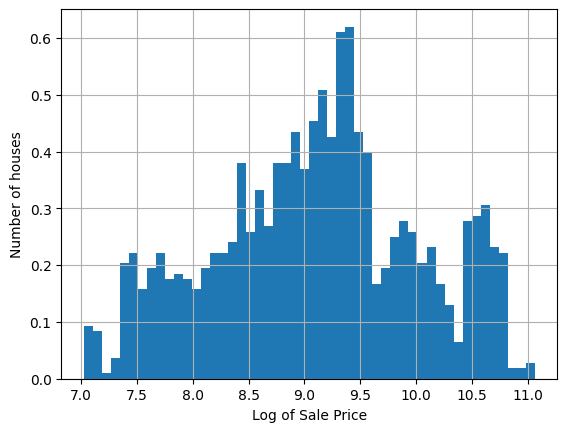

In [12]:
# let's transform the target using the logarithm

np.log(data['charges']).hist(bins=50, density=True)
plt.ylabel('Number of patients')
plt.xlabel('Log of charges')
plt.show()

Now the distribution looks more Gaussian.

## Variable Types

Next, let's identify the categorical and numerical variables

In [15]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['sex', 'smoker', 'region']

In [16]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [18]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'charges'
]

# number of numerical variables
num_vars

['age', 'bmi', 'children']

# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [19]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

### We can see that this dataset contains no missing values

## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [20]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [21]:
# let's visualise the discrete variables

data[discrete_vars].head()

,children
0,0
1,1
2,3
3,0
4,0


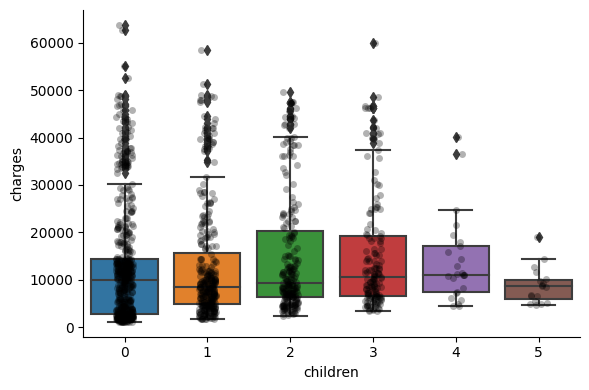

In [22]:
# make boxplot with Catplot
sns.catplot(x='children', y='charges', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
sns.stripplot(x='children', y='charges', data=data, jitter=0.1, alpha=0.3, color='k')
plt.show()

For children variable, we don’t see this tendency. Most likely that variable is not a good predictor of sale price.

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [25]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))
data[cont_vars].head()

Number of continuous variables:  2


,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


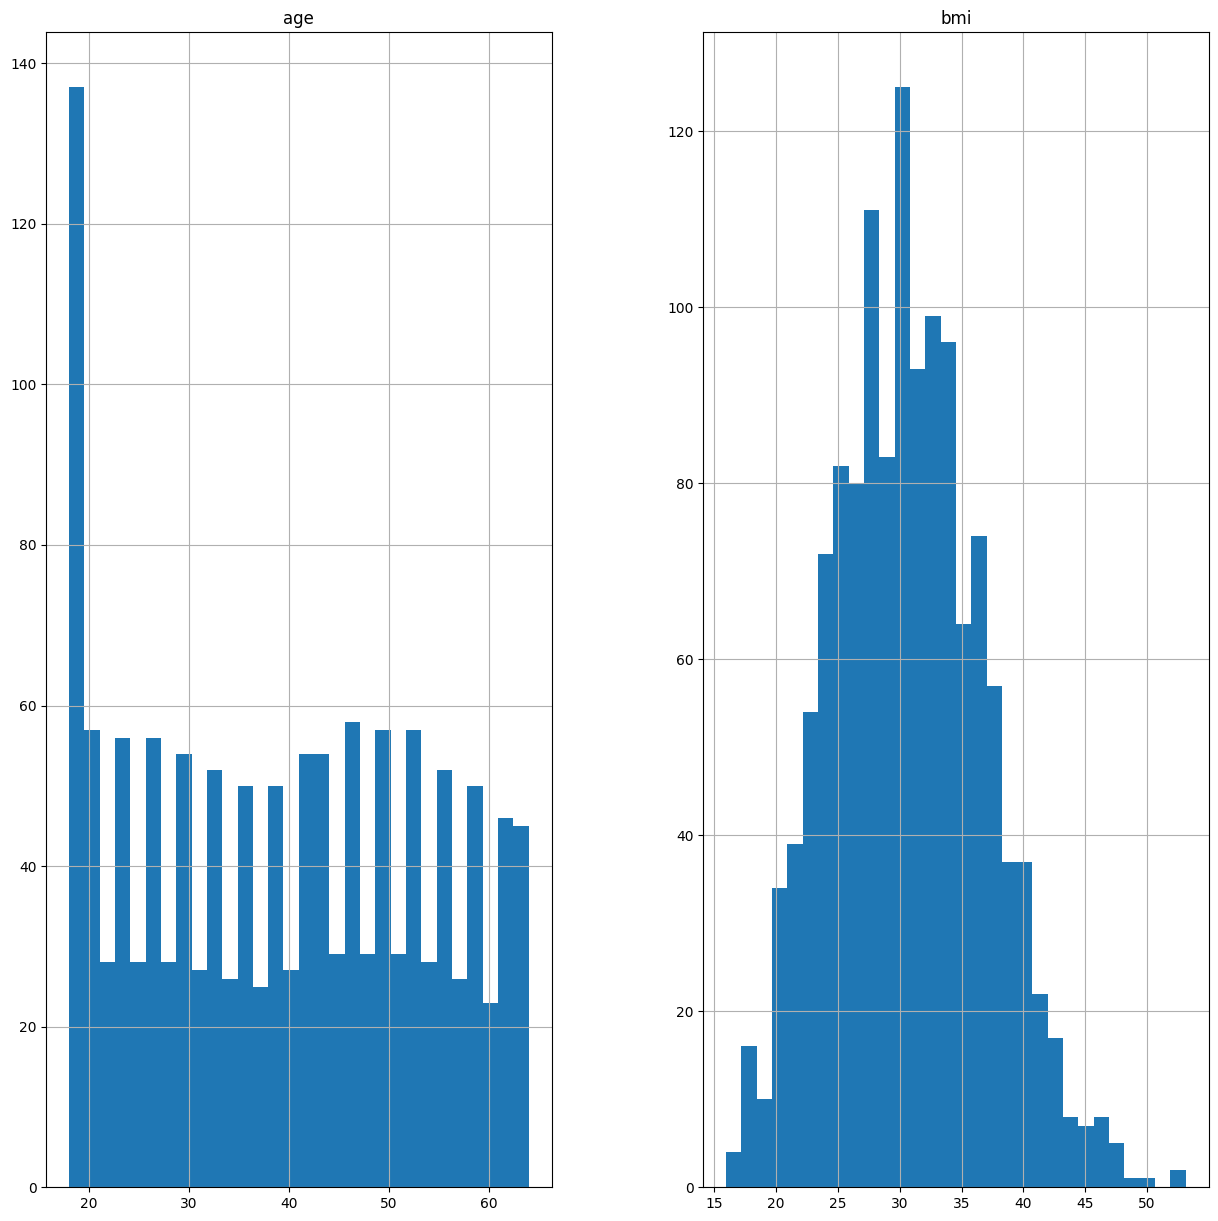

In [26]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

bmi variable seems to be skewed a little to the left
age variable seems to be not normally distributed

### Yeo-Johnson transformation


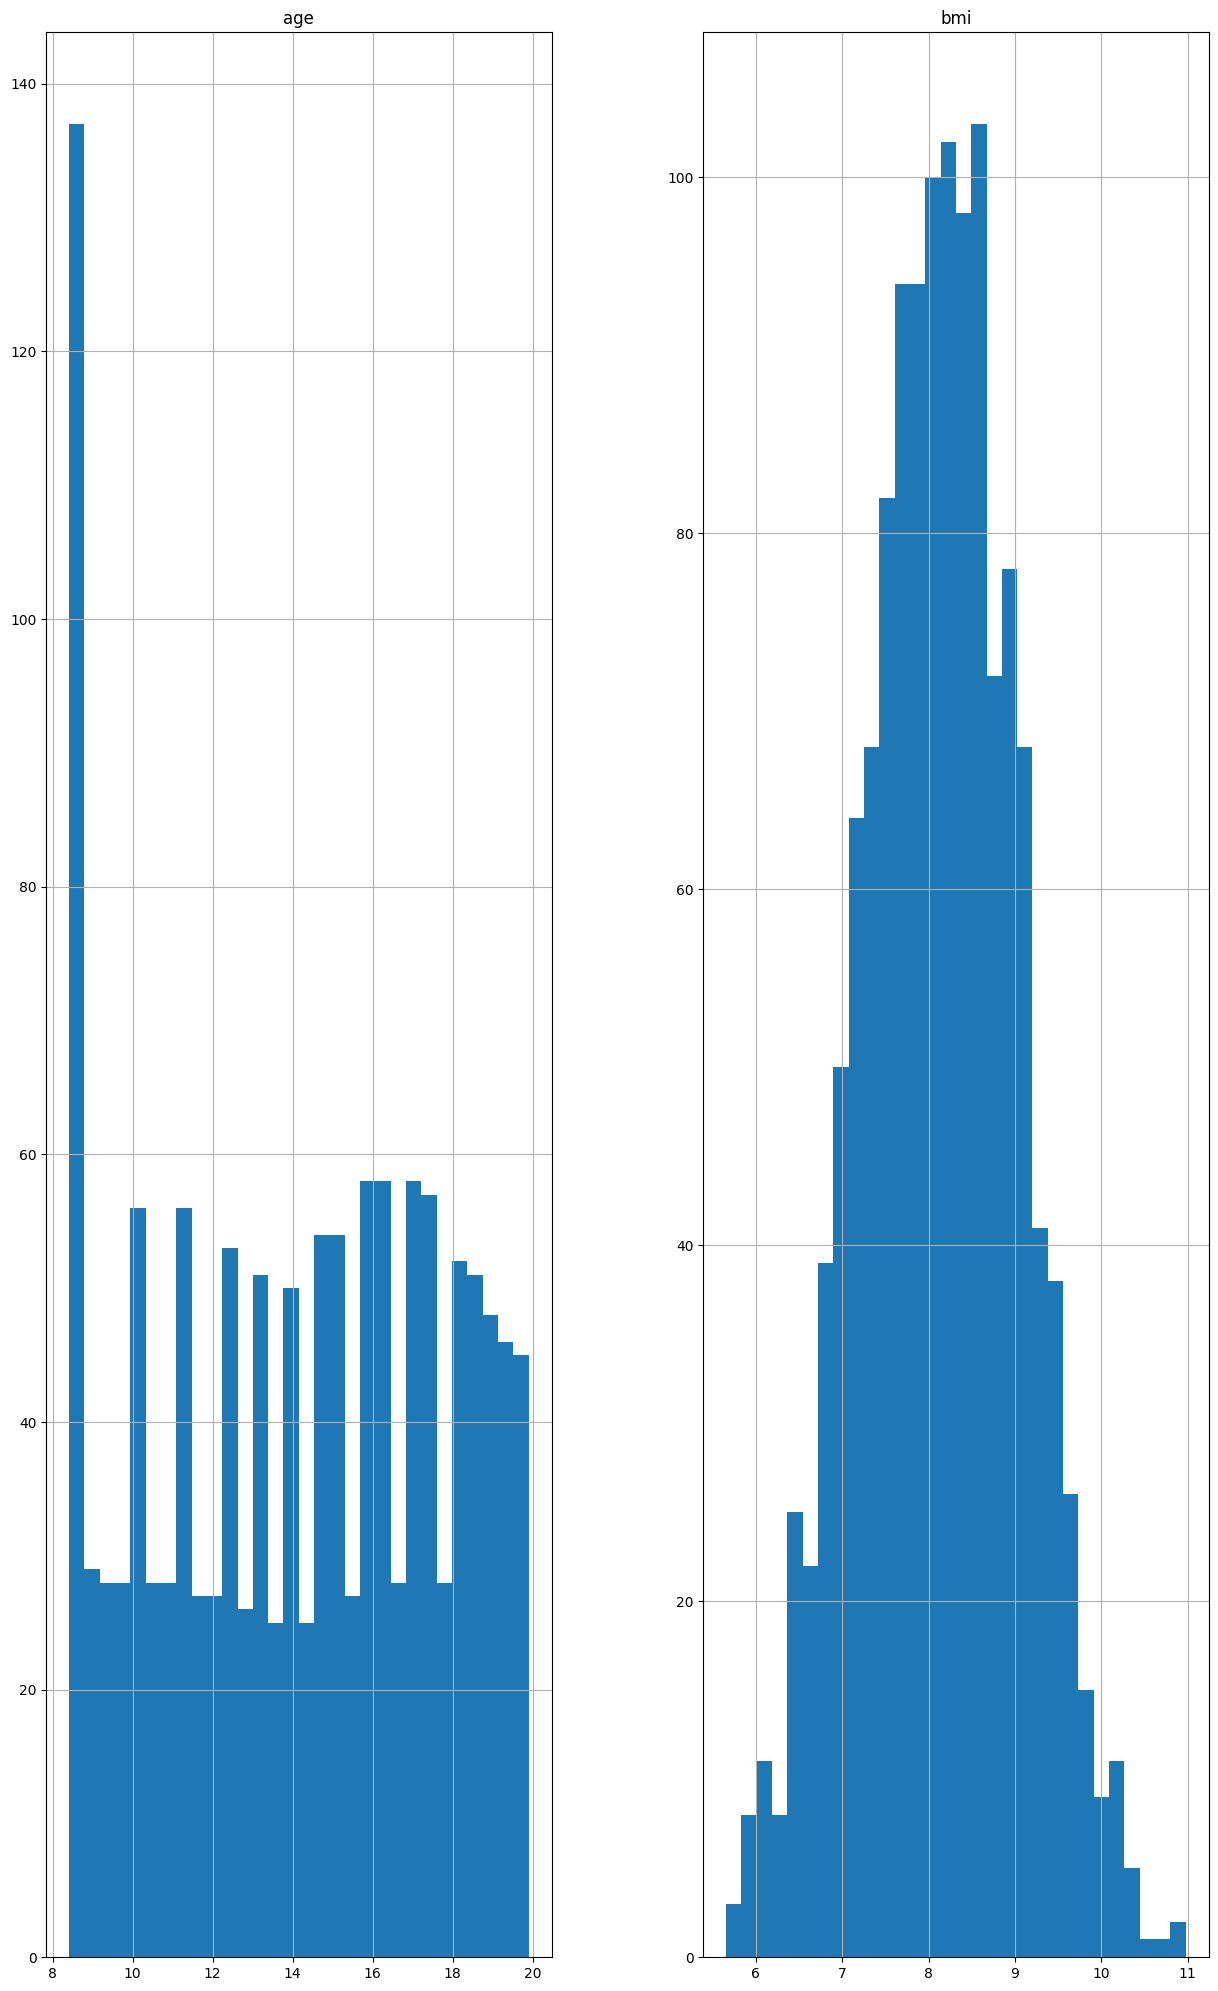

In [27]:
tmp = data.copy()

for var in cont_vars:

    tmp[var], param = stats.yeojohnson(data[var])

tmp[cont_vars].hist(bins=30, figsize=(15, 25))
plt.show()

For age the transformation did not do an amazing job.

For the bmi, the values seem to be spread more evenly in the range.

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [29]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  3


In [30]:
data[cat_vars].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

<AxesSubplot: >

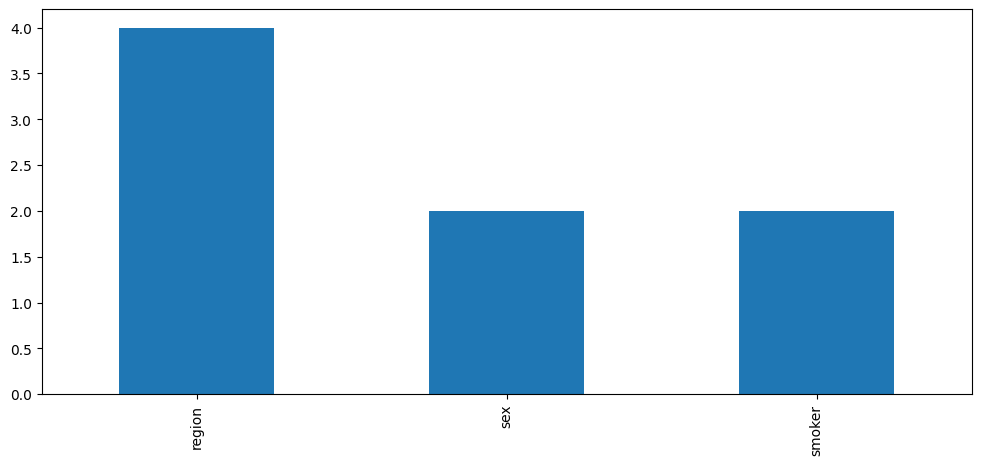

In [31]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [33]:
for var in cat_vars:
    print(f"Unique vars for {var}: {data[var].unique()}")

Unique vars for sex: ['female' 'male']
Unique vars for smoker: ['yes' 'no']
Unique vars for region: ['southwest' 'southeast' 'northwest' 'northeast']


All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality

Now let's create numerical mappings for categorical variables

In [35]:
sex_mappings = {'male': 0, 'female': 1}
smoker_mappings = {'no': 0, 'yes': 1}
region_mappings = {'southwest': 0, 'southeast': 1,
                   'northwest': 2, 'northeast': 3}

In [36]:
data['sex'] = data['sex'].map(sex_mappings)
data['smoker'] = data['smoker'].map(smoker_mappings)
data['region'] = data['region'].map(region_mappings)

data[cat_vars].head()

,sex,smoker,region
0,1,1,0
1,0,0,1
2,0,0,1
3,0,0,2
4,0,0,2


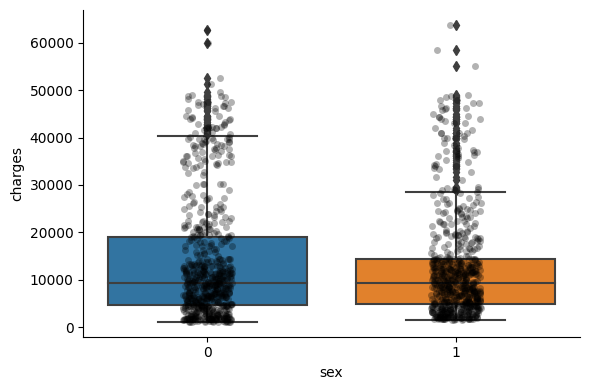

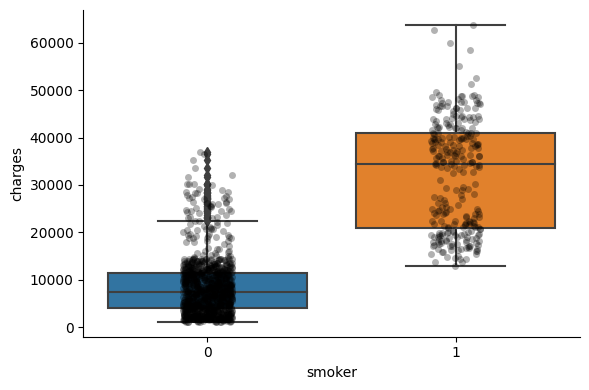

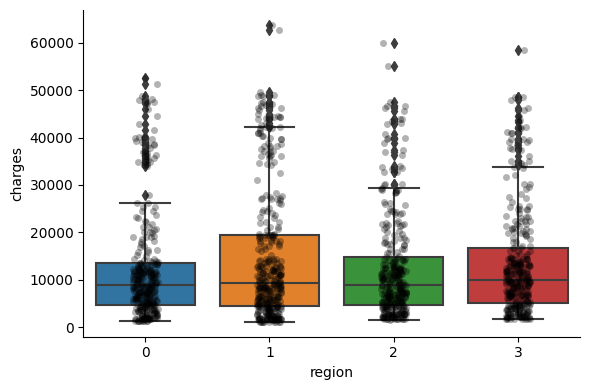

In [37]:
for var in cat_vars:
    sns.catplot(x=var, y='charges', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='charges', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of patients:

In [38]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['charges'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: charges, dtype: float64)

Series([], Name: charges, dtype: float64)

Series([], Name: charges, dtype: float64)



As we can see there is no rare labels in those variables